## Import the movies data from the NLTK corpus. It contains 2000 tweets about movies


In [1]:
from nltk.corpus import movie_reviews 

documents = []
 
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((movie_reviews.words(fileid), category))
all_words = [word.lower() for word in movie_reviews.words()]
print(documents[:5])
print("----------------------------------------------------------------------------------------------------------------------")
print(all_words[:5])

[(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg'), (['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], 'neg'), (['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], 'neg'), (['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], 'neg'), (['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], 'neg')]
----------------------------------------------------------------------------------------------------------------------
['plot', ':', 'two', 'teen', 'couples']


## Remove stopwords and punctuation marks

In [2]:

from nltk.corpus import stopwords
import string
stopwords_english = stopwords.words('english')

all_clean_words = []
for word in all_words:
    if word not in stopwords_english and word not in string.punctuation:
        all_clean_words.append(word)

print(all_clean_words[200:250])
 


['giving', 'us', 'different', 'scenes', 'offering', 'insight', 'strangeness', 'going', 'movie', 'apparently', 'studio', 'took', 'film', 'away', 'director', 'chopped', 'shows', 'might', 'pretty', 'decent', 'teen', 'mind', 'fuck', 'movie', 'somewhere', 'guess', 'suits', 'decided', 'turning', 'music', 'video', 'little', 'edge', 'would', 'make', 'sense', 'actors', 'pretty', 'good', 'part', 'although', 'wes', 'bentley', 'seemed', 'playing', 'exact', 'character', 'american', 'beauty', 'new']


## Using the Bag of words approach first

In [3]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    word = movie_reviews.words(fileid)
    positive_reviews.append(word)

negitive_reviews = []
for fileid in movie_reviews.fileids('neg'):
    word = movie_reviews.words(fileid)
    negitive_reviews.append(word)

#Feature extraction
def bag_of_words(words):
    clean_words = []
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            clean_words.append(word)
    
    word_dict = dict([word, True] for word in clean_words)
    return word_dict


In [4]:
bag_of_words(all_clean_words)

{'plot': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'church': True,
 'party': True,
 'drink': True,
 'drive': True,
 'get': True,
 'accident': True,
 'one': True,
 'guys': True,
 'dies': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'life': True,
 'nightmares': True,
 'deal': True,
 'watch': True,
 'movie': True,
 'sorta': True,
 'find': True,
 'critique': True,
 'mind': True,
 'fuck': True,
 'generation': True,
 'touches': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'bad': True,
 'package': True,
 'makes': True,
 'review': True,
 'even': True,
 'harder': True,
 'write': True,
 'since': True,
 'generally': True,
 'applaud': True,
 'films': True,
 'attempt': True,
 'break': True,
 'mold': True,
 'mess': True,
 'head': True,
 'lost': True,
 'highway': True,
 'memento': True,
 'good': True,
 'ways': True,
 'making': True,
 'types': True,
 'folks': True,
 'snag': True,
 'correctly': True,
 'seem': True,
 'taken': True,
 'pretty': True,
 '

## Create set of features

In [5]:
#+ve review feature are appended to a  set
pos_review_set = []
for words in positive_reviews:
    pos_review_set.append((bag_of_words(words), 'pos'))

# -ve review feature are appended to a  set 
neg_review_set = []
for words in negitive_reviews:
    neg_review_set.append((bag_of_words(words), 'neg'))



In [6]:
neg_review_set

[({'plot': True,
   'two': True,
   'teen': True,
   'couples': True,
   'go': True,
   'church': True,
   'party': True,
   'drink': True,
   'drive': True,
   'get': True,
   'accident': True,
   'one': True,
   'guys': True,
   'dies': True,
   'girlfriend': True,
   'continues': True,
   'see': True,
   'life': True,
   'nightmares': True,
   'deal': True,
   'watch': True,
   'movie': True,
   'sorta': True,
   'find': True,
   'critique': True,
   'mind': True,
   'fuck': True,
   'generation': True,
   'touches': True,
   'cool': True,
   'idea': True,
   'presents': True,
   'bad': True,
   'package': True,
   'makes': True,
   'review': True,
   'even': True,
   'harder': True,
   'write': True,
   'since': True,
   'generally': True,
   'applaud': True,
   'films': True,
   'attempt': True,
   'break': True,
   'mold': True,
   'mess': True,
   'head': True,
   'lost': True,
   'highway': True,
   'memento': True,
   'good': True,
   'ways': True,
   'making': True,
   'types

## Shuffle both the review sets to get a random distribution

In [11]:
from random import shuffle 
shuffle(pos_review_set)
shuffle(neg_review_set)

## Create test and train data sets

In [12]:

test_po_limit=int(0.2*len(pos_review_set))
test_neg_limit=int(0.2*len(neg_review_set))
test_set = pos_review_set[:test_po_limit] + neg_review_set[:test_neg_limit]
train_set = pos_review_set[test_po_limit:] + neg_review_set[test_neg_limit:]

#Create test_file and train_file
#import csv


#filew = csv.writer(open("train_file.csv", "w"))
#for key, val in train_set[0][0].items():
#    filew.writerow([key, val])
#del filew
#filew = csv.writer(open("test_file.csv", "w"))
#for key, val in test_set[0][0].items():
#    filew.writerow([key, val])

## Create NaiveBayes classifier

In [13]:
from nltk import classify
from nltk import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(train_set)
accuracy = classify.accuracy(classifier, test_set)
print(round(accuracy,3))
#Accuracy is 75.2%



0.713


## Unigram and Bigram Approach

In [14]:
from nltk import ngrams
 
stopwords_english = stopwords.words('english')
 
# remove all stopwords and punctuation marks
def clean_words(words, stopwords_english):
    word_clean = []
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            word_clean.append(word)    
    return word_clean 
 
# feature extraction for unigrams
def bag_of_words(words):    
    word_dict = dict([word, True] for word in words)    
    return word_dict
 
# feature extractor for bigram
def bag_of_bigrams(words, n=2):
    words_big = []
    for item in iter(ngrams(words, n)):
        words_big.append(item)
    words_dict = dict([word, True] for word in words_big)    
    return words_dict


imp_words = ['above', 'below', 'off', 'over', 'under', 'more', 'most', 'such', 'no', 'nor', 'not',
                   'only', 'so', 'than', 'too', 'very', 'just', 'but']
 
stopwords_for_bigrams = set(stopwords_english) - set(imp_words)
 
word_cleaning_for_bigrams = clean_words(words, stopwords_for_bigrams)

def bag_of_every_word(words, n=2):
    word_clean = clean_words(words, stopwords_english)
    word_cleaning_for_bigrams = clean_words(words, stopwords_for_bigrams)
 
    unigram_features = bag_of_words(word_clean)
    bigram_features = bag_of_bigrams(word_cleaning_for_bigrams)
 
    all_features = unigram_features.copy()
    all_features.update(bigram_features)
 
    return all_features

## Create Feature Set

In [15]:
#  feature set for positive reviews
pos_reviews_set = []
for words in positive_reviews:
    pos_reviews_set.append((bag_of_every_word(words), 'pos'))

#  feature set for negative reviews
neg_reviews_set = []
for words in negitive_reviews:
    neg_reviews_set.append((bag_of_every_word(words), 'neg'))

In [16]:
pos_reviews_set[:30]

[({'films': True,
   'adapted': True,
   'comic': True,
   'books': True,
   'plenty': True,
   'success': True,
   'whether': True,
   'superheroes': True,
   'batman': True,
   'superman': True,
   'spawn': True,
   'geared': True,
   'toward': True,
   'kids': True,
   'casper': True,
   'arthouse': True,
   'crowd': True,
   'ghost': True,
   'world': True,
   'never': True,
   'really': True,
   'book': True,
   'like': True,
   'hell': True,
   'starters': True,
   'created': True,
   'alan': True,
   'moore': True,
   'eddie': True,
   'campbell': True,
   'brought': True,
   'medium': True,
   'whole': True,
   'new': True,
   'level': True,
   'mid': True,
   '80s': True,
   '12': True,
   'part': True,
   'series': True,
   'called': True,
   'watchmen': True,
   'say': True,
   'thoroughly': True,
   'researched': True,
   'subject': True,
   'jack': True,
   'ripper': True,
   'would': True,
   'saying': True,
   'michael': True,
   'jackson': True,
   'starting': True,
   

## Shuffle the feture sets randomly

In [17]:
from random import shuffle 
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)

## Train the classifier using Naive Bayes

In [18]:
test_po_limit=int(0.2*len(pos_reviews_set))
test_neg_limit=int(0.2*len(neg_reviews_set))
test_set = pos_reviews_set[:test_po_limit] + neg_reviews_set[:test_neg_limit]
train_set = pos_reviews_set[test_po_limit:] + neg_reviews_set[test_neg_limit:]


classifier2 = NaiveBayesClassifier.train(train_set)
 
accuracy2 = classify.accuracy(classifier2, test_set)
print(accuracy2)

## Accuracy is 81%

0.79


## Sentiment Calculator

In [19]:

from nltk.tokenize import word_tokenize
def find_perc(filer):
    probn_list=[]
    probp_list=[]
    probneut_list=[]
    for i in range(len(filer)):
        tweet=filer.iloc[:len(filer),4].values[i]
        custom_review_tokens = word_tokenize(tweet)
        custom_review_set = bag_of_every_word(custom_review_tokens)
        prob_result = classifier2.prob_classify(custom_review_set)
        #print(tweet)
        #print(prob_result.prob('neg'))
        #print(prob_result.prob('pos'))
 
        if prob_result.prob("neg")-prob_result.prob("pos")>=0.4:
            probn_list.append(1)
        elif prob_result.prob("pos")-prob_result.prob("neg")>=0.4:
            probp_list.append(1)
        else:
            probneut_list.append(1)
    sentiment_p_sum= sum(probp_list)
    sentiment_n_sum=sum(probn_list)
    sentiment_neu_sum=sum(probneut_list)
    #print(len(filer))
    per_pos=(sentiment_p_sum/len(filer))*100
    per_neg=(sentiment_n_sum/len(filer))*100
    per_neut=(sentiment_neu_sum/len(filer))*100
    return [per_pos,per_neg,per_neut]


## Confusion Matrix

In [20]:
import pandas as pd


def comparison_func(filer):
    
    actual=filer.iloc[:,5].tolist()
    for i in range(len(actual)):
        if actual[i] <= (-0.4):
            actual[i]=0
        elif actual[i]>=0.4:
            actual[i]=1
        else:
            actual[i]=0.5
   
    predicted=[]
    
    for i in range(len(filer)):
        tweet=filer.iloc[:len(filer),4].values[i]
        custom_review_conftokens = word_tokenize(tweet)
        custom_review_confset = bag_of_every_word(custom_review_conftokens)
        prob_confresult = classifier2.prob_classify(custom_review_confset)

        if prob_confresult.prob("neg")-prob_confresult.prob("pos")>=0.4:
            predicted.append(0)
        elif prob_confresult.prob("pos")-prob_confresult.prob("neg")>=0.4:
            predicted.append(1)
        else:
            predicted.append(0.5)
    data = {'y_Predicted': predicted,
        'y_Actual': actual
        }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'],margins='True')
    print (confusion_matrix)
    
    #confusion_matrix.print_stats()
   
    confmatrix_graph(confusion_matrix)
    return

## Create Heatmaps

In [21]:
import seaborn as sn
import time
import matplotlib.pyplot as plt
def confmatrix_graph(conf_mtx):
    sn.heatmap(conf_mtx, annot=True)
    plt.show()
    return

## Main Function

Predicted  0.0  0.5  1.0  All
Actual                       
0.0          8    4    1   13
0.5          9   34   16   59
1.0          1    6   20   27
All         18   44   37   99


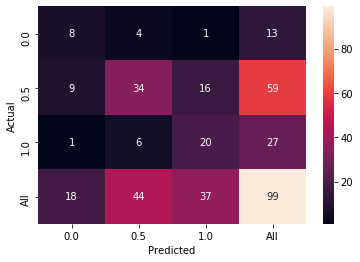

% positive tweets for ndp is :37.0
% negative tweets for ndp is :18.0
% neutral tweets for ndp is :44.0

---------------------------------------------------------------------------------------------

Predicted  0.0  0.5  1.0  All
Actual                       
0.0          4    2    0    6
0.5          8   38   10   56
1.0          2    5   29   36
All         14   45   39   98


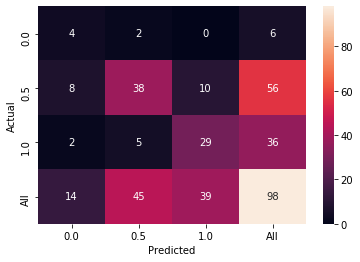

% positive tweets for peoplesparty is :40.0
% negative tweets for peoplesparty is :14.0
% neutral tweets for peoplesparty is :46.0

---------------------------------------------------------------------------------------------

Predicted  0.0  0.5  1.0  All
Actual                       
0.0         10    1    1   12
0.5          3   26    7   36
1.0          2   11   23   36
All         15   38   31   84


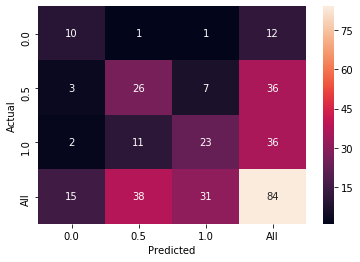

% positive tweets for bloc is :37.0
% negative tweets for bloc is :18.0
% neutral tweets for bloc is :45.0

---------------------------------------------------------------------------------------------

Predicted  0.0  0.5  1.0  All
Actual                       
0.0          7    4    0   11
0.5          4   18    2   24
1.0          0    8   27   35
All         11   30   29   70


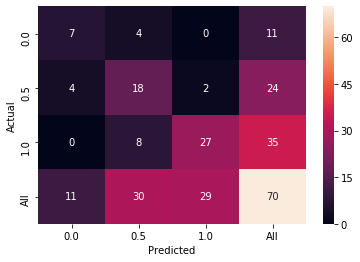

% positive tweets for green is :41.0
% negative tweets for green is :16.0
% neutral tweets for green is :43.0

---------------------------------------------------------------------------------------------

Predicted  0.0  0.5  1.0  All
Actual                       
0.0          8    6    1   15
0.5          2   27   10   39
1.0          1   10   41   52
All         11   43   52  106


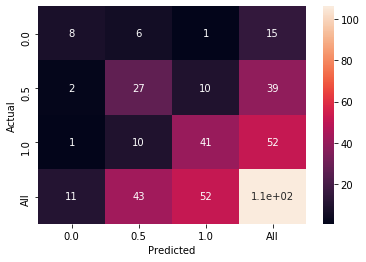

% positive tweets for liberal is :49.0
% negative tweets for liberal is :10.0
% neutral tweets for liberal is :41.0

---------------------------------------------------------------------------------------------

Predicted  0.0  0.5  1.0  All
Actual                       
0.0          8    2    1   11
0.5          3   25    8   36
1.0          0    8   40   48
All         11   35   49   95


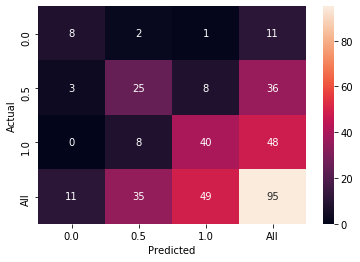

% positive tweets for conservative is :52.0
% negative tweets for conservative is :12.0
% neutral tweets for conservative is :37.0

---------------------------------------------------------------------------------------------



In [26]:
import numpy as np
import pandas as pd
import re
index=["positive","negative","neutral"]
columns=["ndp","peoplesparty","bloc","green","liberal","conservative"]
tally=pd.DataFrame(index=index)
datafile_list=["ndp.csv","peoplesparty.csv","bloc.csv","green.csv","liberal.csv","conservative.csv"]
for i in range(len(datafile_list)):
    filer= pd.read_csv(datafile_list[i],delimiter=',')
    filer.drop_duplicates(keep='first')
    
    [per_pos,per_neg,per_neut]=find_perc(filer.dropna())
    
    comparison_func(filer.dropna())
    
    
    
    
    tally[i]=[per_pos,per_neg,per_neut]
       
    
    print("% positive tweets for "+re.sub('(.csv)',"",datafile_list[i])+" is :" +str(round(per_pos,0)))
    print("% negative tweets for "+re.sub('(.csv)',"",datafile_list[i])+" is :" +str(round(per_neg,0)))
    print("% neutral tweets for "+re.sub('(.csv)',"",datafile_list[i])+" is :" +str(round(per_neut,0)))
    print("\n---------------------------------------------------------------------------------------------\n")

    del filer
tally.columns=columns

## For NDP Accuracy:72%  
## For Peoples Party Accuracy: 74%
## For Bloc: 72%
## For Green Party: 75%
## For Liberal party Accuracy: 70%
## For Conservative Party Accuracy: 76%

In [23]:
tally
# Print the Sentiment dataframe for each political party

ndp  peoplesparty       bloc      green    liberal  \
positive  37.373737     39.795918  36.904762  41.428571  49.056604   
negative  18.181818     14.285714  17.857143  15.714286  10.377358   
neutral   44.444444     45.918367  45.238095  42.857143  40.566038   

          conservative  
positive     51.578947  
negative     11.578947  
neutral      36.842105

## Generate the Charts

In [27]:
import plotly.graph_objects as go

fig1 = go.Figure(data=[
    go.Bar(name='positive', x=columns, y=tally.values[0].tolist()),
    go.Bar(name='negative', x=columns, y=tally.values[1].tolist()),
    go.Bar(name='neutral', x=columns, y=tally.values[2].tolist())
])
fig1.add_trace(
    go.Scatter(
        x=columns,
        y=[24,0,32,3,157,121],
        mode='markers+lines',
        name='Seats won'
    ))
fig1.update_layout(title_text='Polarity of Tweets of political parties V/S Number of seats won')
# Change the bar mode
fig1.update_layout(barmode='group')
fig1.show()

In [28]:
fig2 = go.Figure(data=[
    go.Bar(name='positive', x=columns, y=tally.values[0].tolist()),
    go.Bar(name='negative', x=columns, y=tally.values[1].tolist()),
    go.Bar(name='neutral', x=columns, y=tally.values[2].tolist())
])
fig2.add_trace(
    go.Scatter(
        x=columns,
        y=[15.92,1.64,7.7,6.49,33.06,34.4],
        mode='markers+lines',
        name='Vote %'
    ))
fig2.update_layout(title_text='Polarity of Tweets of political parties V/S Percentage of votes received')
# Change the bar mode
fig2.update_layout(barmode='group')
fig2.show()